# Surface velocity estimation using RGDyn toolbox"

## Diego Cusicanqui, Ph.D. <sup>1,2</sup>

<sup>1</sup> Institut des Sciences de la Terre, Univ. Grenoble Alpes, Saint Martin d'Hères, France \
<sup>2</sup> Laboratoire EDyTEM, Univ. Savoie Mont-Blanc, Le Bourget du lac, France

04-15 december of 2022
La Serena, Chile

<img src=https://materre.osug.fr/IMG/jpg/osuglogoposrgb.jpg width="100" height="50" style="margin:auto"/>

<img src=https://upload.wikimedia.org/wikipedia/fr/thumb/8/8e/Centre_national_de_la_recherche_scientifique.svg/2048px-Centre_national_de_la_recherche_scientifique.svg.png width="100" height="50" style="margin:auto"/>

<img src=https://upload.wikimedia.org/wikipedia/fr/thumb/c/c7/Logo_Universit%C3%A9_Savoie_Mont_Blanc_2015.svg/1200px-Logo_Universit%C3%A9_Savoie_Mont_Blanc_2015.svg.png width="100" height="50" style="margin:auto"/>

In [ ]:
conda activate rgdyn

In [ ]:
ipython

In [7]:
import os
from telenvi import raster_tools as rt

In [16]:
workdir = f"/home/ubuntu/data/La_laguna_velocity/"
os.chdir(workdir)

In [33]:
image_A = f"Geoeye2012_GCP_GE3_ortho.tif"
image_B = f"Tapado_LaLaguna_2020_Ple_ortho.tif"
aoi_1 = f"AOIs_tapado_1.shp"
aoi_4 = f"AOIs_tapado_4.shp"

In [45]:
crop_imgA = rt.pre_process(image_A, geoim=True).cropFromVector(aoi_4)

ValueError: not enough values to unpack (expected 4, got 0)

In [34]:
imga = rt.pre_process(image_A, geoim=True)

In [22]:
imga

pixel size : (0.5, -0.5)
origin     : (409724.0, 6669671.0)
bands      : 1
rows       : 15789
columns    : 13094
SCR epsg   : 4326
SCR name   : WGS 84 / UTM zone 19S
array type : uint16


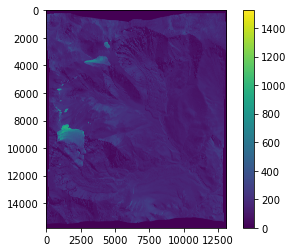

In [40]:
imga.show()

In [35]:
crop_imga = imga.cropFromVector(aoi_1)

In [25]:
crop_imga

pixel size : (0.5, -0.5)
origin     : (412622.5, 6664396.5)
bands      : 1
rows       : 1400
columns    : 1400
SCR epsg   : 4326
SCR name   : WGS 84 / UTM zone 19S
array type : uint16


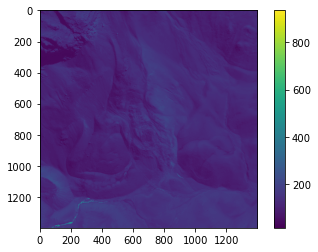

In [41]:
crop_imga.show()

In [42]:
crop_imga.save("20101130_ortho_GCP_GE_crop.tif")

20101130_ortho_GCP_GE_crop.tif OK


In [ ]:
crop_imgA = rt.pre_process(image_A, geoim=True).cropFromVector(aoi_4)

In [36]:
imgc = rt.pre_process(image_C, geoim=True)

In [37]:
imgc

pixel size : (1.0, -1.0)
origin     : (404836.0251, 6667121.7637)
bands      : 1
rows       : 15268
columns    : 16618
SCR epsg   : 4326
SCR name   : WGS 84 / UTM zone 19S
array type : uint8


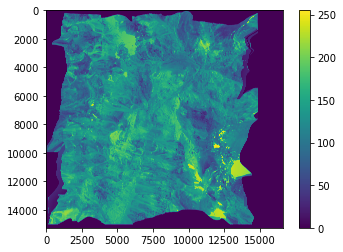

In [30]:
imgc.show()

In [38]:
crop_imgc = imgc.cropFromVector(aoi_4)

In [39]:
crop_imgc

pixel size : (1.0, -1.0)
origin     : (408138.0251, 6656183.7637)
bands      : 1
rows       : 1469
columns    : 2268
SCR epsg   : 4326
SCR name   : WGS 84 / UTM zone 19S
array type : uint8


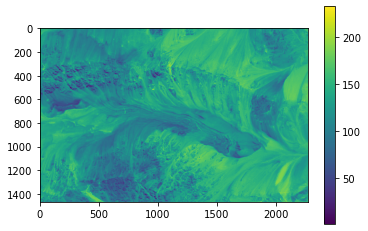

In [43]:
crop_imgc.show()

In [44]:
crop_imgc.save("20000531_Tapado_1m_crop.tif")

20000531_Tapado_1m_crop.tif OK


In [ ]:
crop_imgC = rt.pre_process(image_C, geoim=True).cropFromVector(aoi_4)

# Make some correlations

In [ ]:
rgdyn_corr.py  --corr_kernel_size 7 --corr_xthreshold 10 \
--out_dir run --out_prefix run_corr Geoeye2012_GCP_GE3_ortho_crop.tif Tapado_LaLaguna_2020_Ple_ortho_crop.tif

In [ ]:
rgdyn_magn.py run/run_corr-F.tif

In [ ]:
rgdyn_vect.py -vd 10 -epsg 32719 
run/run_corr-F.tif run/run_corr-F_vect.shp